
<font size="6" color="Green" align="center"><b>LEVEL 2</b></font><br>

<font size="5" color="Darkblue" align="center"><b>Project1 - Housing Price Prediction using Linear Regression  </b></font>


<font size="4" color="purple" align="center"><b>Introduction</b></font><br>

In this project, the focus is on predicting house prices using linear regression. The objective is to build a predictive model that estimates house prices based on a dataset containing various relevant features. Linear regression, a fundamental machine learning technique, will be employed to model the relationship between the dependent variable (house prices) and independent variables (features of the houses). This project provides an opportunity to develop, evaluate, and interpret a predictive model in a practical setting.
I<br>

<font size="4" color="purple" align="center"><b>Dataset</b></font><br>

* Link : (<a href="https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression">Kaggle Dataset</a>)
* Description: The dataset includes numerous features related to house attributes, such as the number of rooms, location, size, and other factors that might influence house prices. It is designed to replicate a real-world scenario where linear regression can be applied to forecast house prices effectively.

<font size="4" color="purple" align="center"><b>Key Concepts and Challenges</b></font><br>  
1. Data Collection: Obtain the dataset with numerical features and house prices.
2. Data Exploration and Cleaning: Explore and clean the dataset, handling missing values and outliers.
3. Feature Selection: Identify and select relevant features for predicting house prices.
4. Model Training: Implement linear regression using a library like Scikit-Learn.
5. Model Evaluation: Evaluate model performance using metrics such as Mean Squared Error (MSE) or R-squared.
6. Visualization: Create visualizations to show the relationship between predicted and actual house prices.

<font size="4" color="purple" align="center"><b>Objectives</b></font><br>
* Learn the fundamentals of linear regression and its use in predictive modeling.
* Develop a predictive model using real-world data.
* Gain skills in evaluating and interpreting model performance.

<font size="4" color="green" align="center"><b>Importing Necessary Libraries</b></font><b></b>

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


<font size="4" color="darkblue" align="center"><b>1. Data Collection</b></font></b>

<font size="3" color="black" align="center"><b>1.1 Load the Dataset</b></font></b>

In [3]:
# Read CSV file into a DataFrame
df = pd.read_csv("Housing.csv")

<font size="3" color="black" align="center"><b>1.1 Audit Data</b></font></b>

In [4]:
df.head() # Show first 5 records of data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.tail() # Last five rows of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
# Show the dimensions of the DataFrame
df.shape

(545, 13)

In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [9]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


<font size="4" color="darkblue" align="center"><b>1. Data Cleaning </b></font></b>

In [10]:
# Using isnull() check the missing value
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


There are no NULL values in the dataset, hence it is clean.


<font size="3" color="black" align="center"><b>Outlier Visualization Using boxplot</b></font></b>

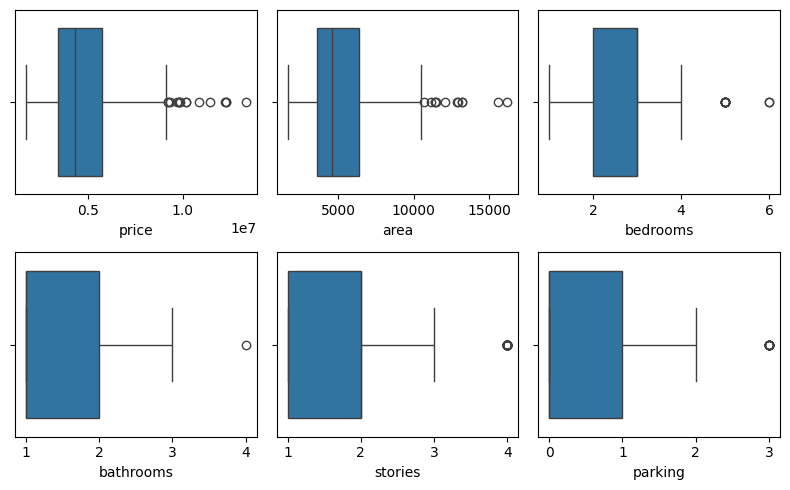

In [11]:
# Creating subplots for each feature
fig, axs = plt.subplots(2, 3, figsize=(8, 5))

# Boxplots for different features
sns.boxplot(data=df, x='price', ax=axs[0, 0])
sns.boxplot(data=df, x='area', ax=axs[0, 1])
sns.boxplot(data=df, x='bedrooms', ax=axs[0, 2])
sns.boxplot(data=df, x='bathrooms', ax=axs[1, 0])
sns.boxplot(data=df, x='stories', ax=axs[1, 1])
sns.boxplot(data=df, x='parking', ax=axs[1, 2])

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()


In [12]:
# Calculating the first quartile (Q1), third quartile (Q3), and IQR
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
df_filtered = df[(df.price >= lower_bound) & (df.price <= upper_bound)]

# Display the number of rows before and after filtering
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after outlier removal: {df_filtered.shape[0]}")


Original number of rows: 545
Number of rows after outlier removal: 530


In [13]:
# Calculating the first quartile (Q1), third quartile (Q3), and IQR for 'area'
Q1_area = df.area.quantile(0.25)
Q3_area = df.area.quantile(0.75)
IQR_area = Q3_area - Q1_area

# Defining the lower and upper bounds for outliers for 'area'
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Filtering out the outliers in 'area'
df_filtered_area = df[(df.area >= lower_bound_area) & (df.area <= upper_bound_area)]

# Display the number of rows before and after filtering
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after outlier removal for 'area': {df_filtered_area.shape[0]}")

Original number of rows: 545
Number of rows after outlier removal for 'area': 533


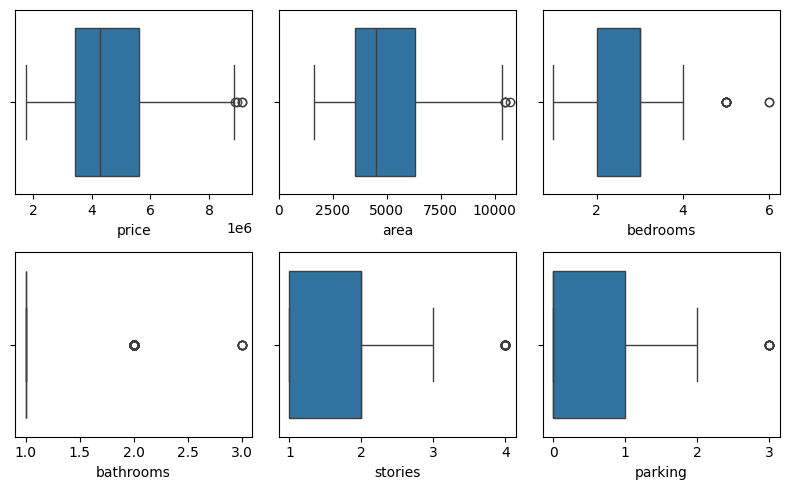

In [14]:
# Creating subplots for each feature
fig, axs = plt.subplots(2, 3, figsize=(8, 5))

# Boxplots for different features using the filtered DataFrame
sns.boxplot(data=df_filtered, x='price', ax=axs[0, 0])
sns.boxplot(data=df_filtered, x='area', ax=axs[0, 1])
sns.boxplot(data=df_filtered, x='bedrooms', ax=axs[0, 2])
sns.boxplot(data=df_filtered, x='bathrooms', ax=axs[1, 0])
sns.boxplot(data=df_filtered, x='stories', ax=axs[1, 1])
sns.boxplot(data=df_filtered, x='parking', ax=axs[1, 2])

# Adjust layout to avoid overlap
plt.tight_layout()
# Set x-axis limit for the 'area' subplot
axs[0, 1].set_xlim(0, 11000)

# Display the plots
plt.show()


In [15]:
df = df_filtered
df.shape

(530, 13)

<font size="4" color="darkblue" align="center"><b>2. Data Exploration and Cleaning</b></font></b>

<font size="3" color="black" align="center"><b>2.1 Histograms for numerical features</b></font></b>  

<Figure size 900x600 with 0 Axes>

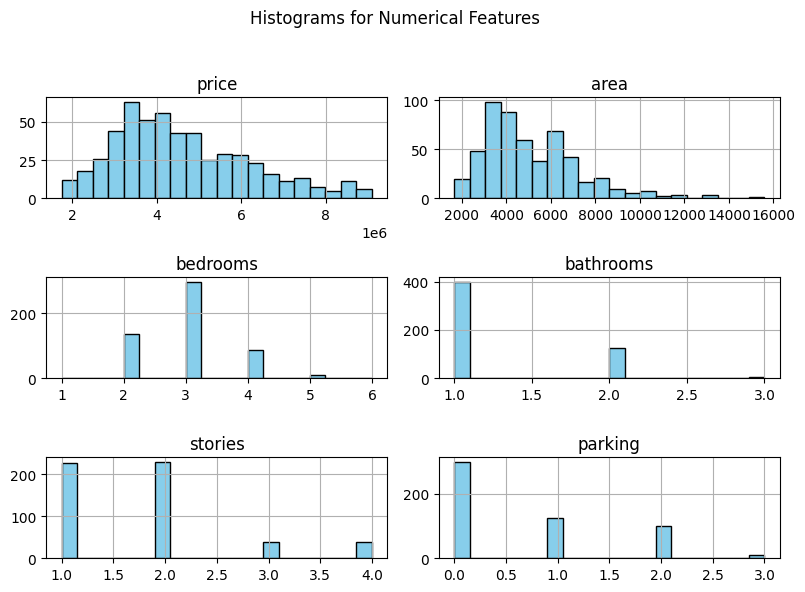

In [16]:
# Histograms for numerical features with color
plt.figure(figsize=(9, 6))
df.hist(figsize=(8, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numerical Features', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

<font size="3" color="black" align="center"><b>2.2 Count plots for categorical features with color </b></font></b>  

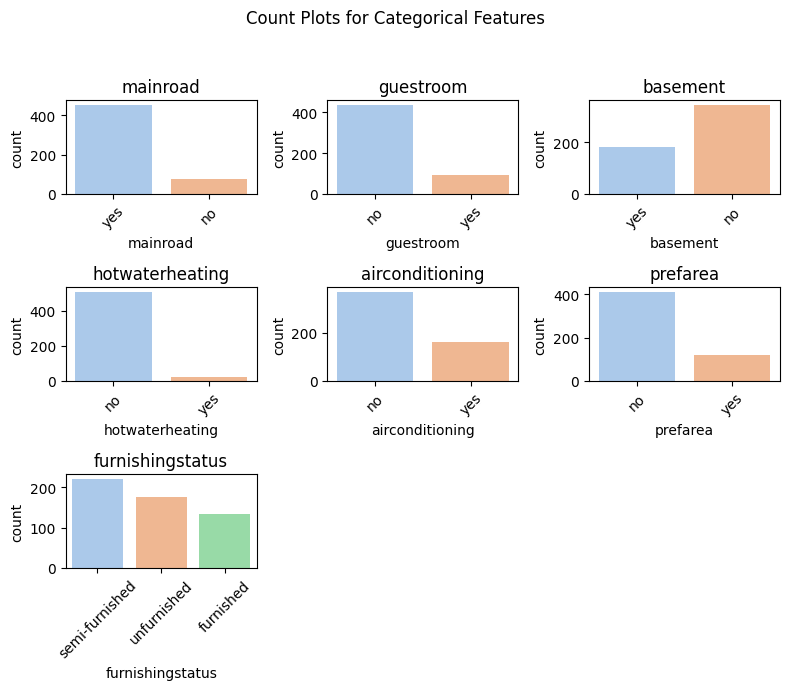

In [17]:
# Count plots for categorical features with color
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(8, 7))
plt.suptitle('Count Plots for Categorical Features', fontsize=12)
colors = sns.color_palette('pastel')  # Choose a color palette
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette=colors)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

<font size="3" color="black" align="center"><b>2. 3 Price Distribution by Furnishing Status and Air Conditioning </b></font></b>  

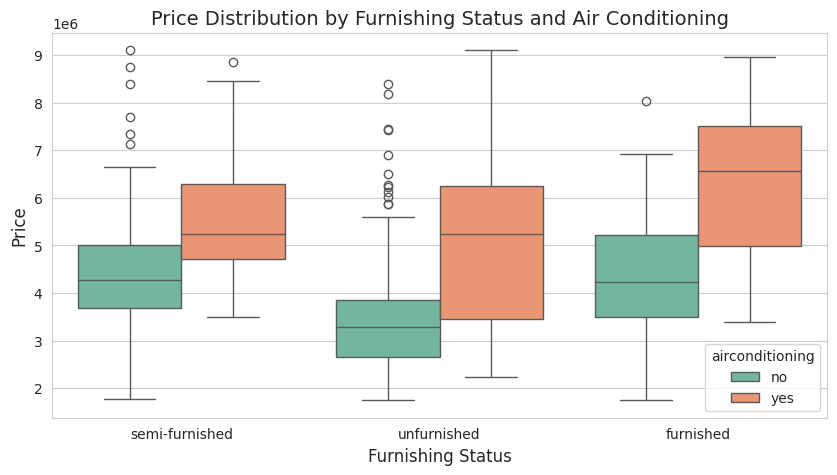

In [18]:
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")  # Choose a color palette

# Create the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=df, palette=palette)

# Add title and labels
plt.title('Price Distribution by Furnishing Status and Air Conditioning', fontsize=14)
plt.xlabel('Furnishing Status', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()

<font size="3" color="black" align="center"><b>2.4 Correlation between Price and Area </b></font></b>  

Correlation between Price and Area: 0.51

First 5 rows of Price and Area:
      price  area
15  9100000  6000
16  9100000  6600
17  8960000  8500
18  8890000  4600
19  8855000  6420


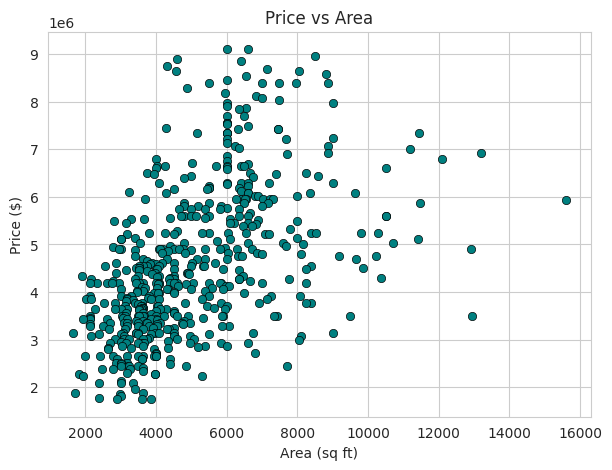

In [19]:
# Print correlation between price and area
correlation = df['price'].corr(df['area'])
print(f"Correlation between Price and Area: {correlation:.2f}")

# Print the first few rows of 'price' and 'area' columns
print("\nFirst 5 rows of Price and Area:")
print(df[['price', 'area']].head())

# Scatter plot between price and area
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='area', y='price', color='teal', edgecolor='black')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


<font size="4" color="darkblue" align="center"><b>2. Data Preparation</b></font></b>

Convert categorical variables with values "Yes" and "No" into numerical values (1s and 0s) to facilitate numerical analysis and modeling, particularly for regression models.

In [20]:
# List of variables to map

var =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[var] = df[var].apply(binary_map)

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


To convert the categorical variable furnishingstatus into dummy variables, and the preceding steps to ensure the dataset is ready for this transformation.

In [22]:
# Create dummy variables for 'furnishingstatus'
df_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus', drop_first = True)

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, df_dummies], axis=1)

# Drop the original 'furnishingstatus' column
df.drop('furnishingstatus', axis=1, inplace=True)

print("DataFrame with Dummy Variables:")
df.head()

DataFrame with Dummy Variables:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


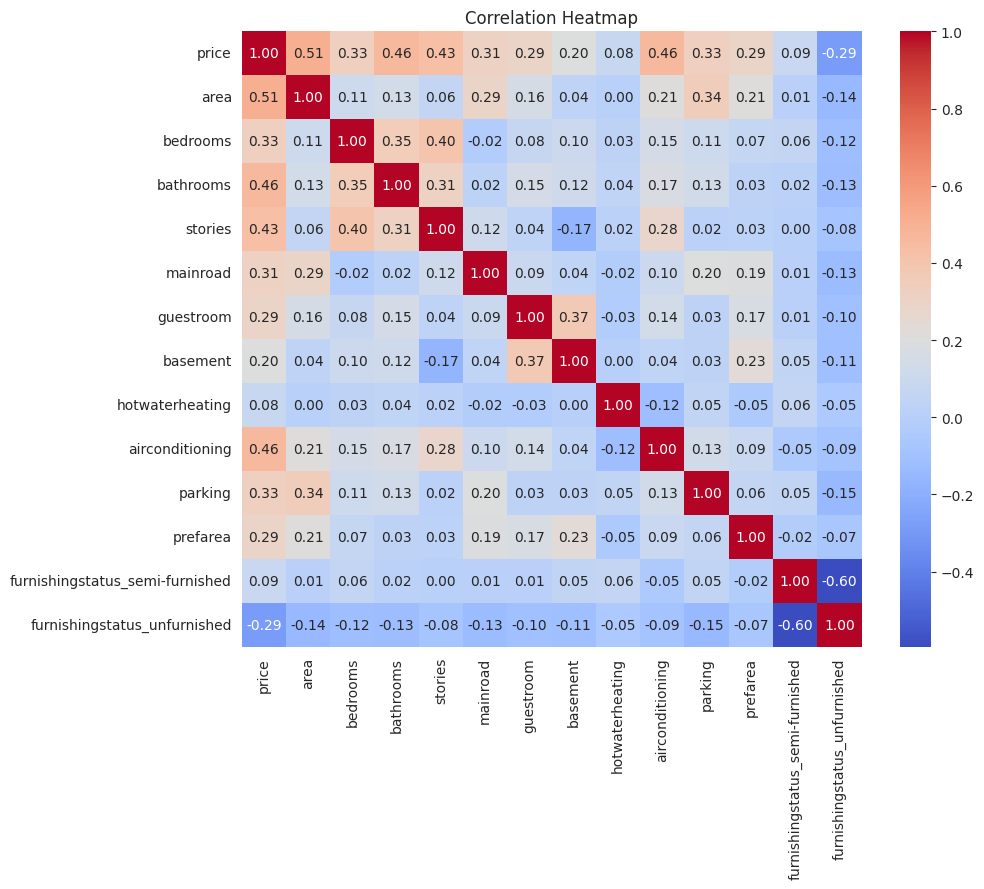

In [23]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<b>Training and Testing Sets</b>

In [24]:
# Split the data into training and testing sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

<font size="4" color="darkblue" align="center"><b>4. Rescaling the Features</b></font></b>

In [25]:

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of numerical variables to scale
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# Apply scaler to the numerical columns in the training DataFrame
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Apply the same scaler to the numerical columns in the test DataFrame
df_test[num_vars] = scaler.transform(df_test[num_vars])


<font size="4" color="darkblue" align="center"><b>5. Model Building using Linear Regression</b></font></b>

In [26]:
# Define features and target
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

In [27]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

<font size="4" color="darkblue" align="center"><b>6.Model Evaluation</b></font></b>

In [28]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
R-squared (R²): 0.69


<font size="3" color="black" align="center"><b>Feature Coefficients from Linear Regression Model</b></font></b>


Model Coefficients:
                                 Coefficient
area                                0.409107
bedrooms                            0.023675
bathrooms                           0.206060
stories                             0.208356
mainroad                            0.052090
guestroom                           0.036843
basement                            0.043920
hotwaterheating                     0.112892
airconditioning                     0.102397
parking                             0.071691
prefarea                            0.096064
furnishingstatus_semi-furnished     0.011974
furnishingstatus_unfurnished       -0.042073


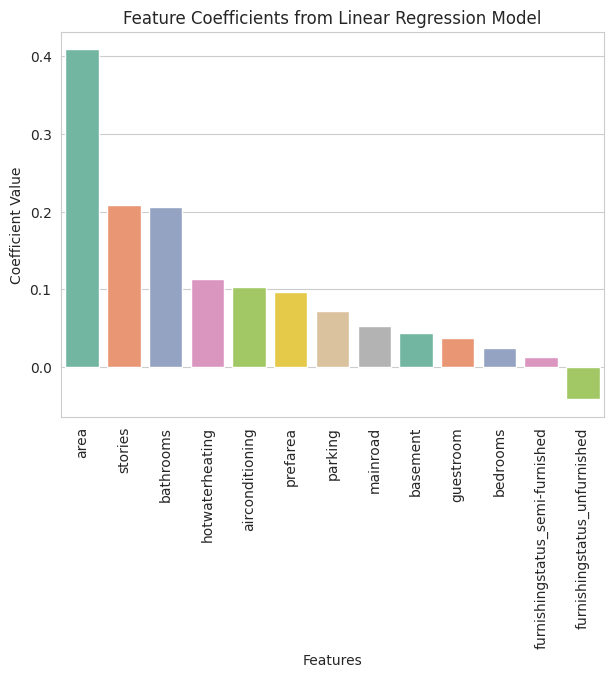

In [29]:
# Display coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)

# Sort coefficients by absolute value for better visualization
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients, palette='Set2')
plt.title('Feature Coefficients from Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.show()

<font size="4" color="darkblue" align="center"><b>7. Scatter Plot of Actual vs. Predicted Price</b></font></b>

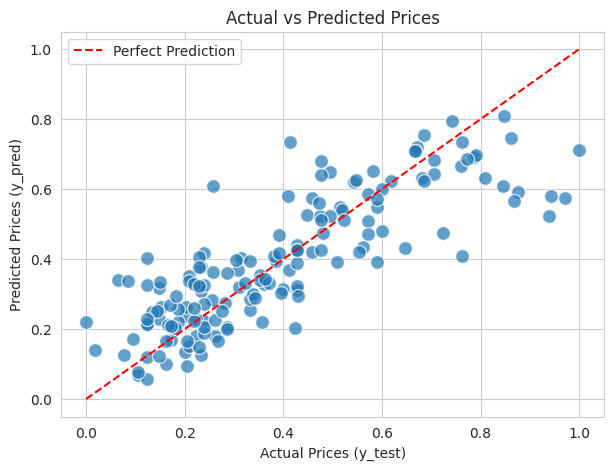

In [30]:
# Plotting y_test vs y_pred to understand the spread
fig = plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', s=100)
plt.title('Actual vs Predicted Prices', fontsize=12)
plt.xlabel('Actual Prices (y_test)', fontsize=10)
plt.ylabel('Predicted Prices (y_pred)', fontsize=10)

# Plot a 45-degree line for reference
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.legend()

plt.grid(True)

<font size="4" color="darkblue" align="center"><b>Insights and Conclusions</b></font>

<b>Model Performance:</b>
The linear regression model serves as a foundational tool for understanding the relationship between house features and prices. While it offers a solid starting point, the assumption of a linear relationship may not fully capture the complexities inherent in real-world data. The performance metrics, including MSE and R-squared, provide a gauge of how well the model's predictions align with actual prices, with lower MSE and higher R-squared indicating superior performance.

<b>Feature Importance:</b>
Through this analysis, we’ve identified key features—such as location, number of rooms, and property size—that play a significant role in determining house prices. Gaining insights into these features is crucial for both making accurate predictions and understanding broader housing market trends.

<b>Challenges:</b>
One limitation of linear regression is its inability to model non-linear relationships effectively. To address this, exploring more advanced models, such as polynomial regression or decision trees, could potentially enhance prediction accuracy and capture more intricate patterns in the data.

<b>Practical Application:</b>
Despite its limitations, the linear regression model can be a valuable resource for real estate professionals and buyers seeking to estimate property values. However, it’s important to recognize its constraints in fully representing all market dynamics.

<b>Final Thoughts</b>
The notebook illustrates a methodical approach to developing and evaluating a linear regression model. Although the model provides useful insights into the housing market, considering more sophisticated modeling techniques could improve prediction accuracy, especially if the data exhibits non-linear characteristics.